In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
#read .csv 
#testpcapdata:https://www.netresec.com/?page=PcapFiles
df = pd.read_csv("pcap_test.csv",nrows=1000)#,encoding="ISO-8859-1")
df = pd.DataFrame(df, columns = ['Source','Time','Protocol'])

#-----------------------------------------------------------------
#print(df.sample(50))
#df.to_csv('example_03153.csv', index=True)

#------------------------------------------------------------------
#data = {'Source': ['192.168.27.253','192.168.27.253','192.168.27.253','198.168.212.83','195.168.21.80','192.168.21.08','192.168.202.83','192.168.27.253','192.168.27.253','192.168.27.253','192.168.27.253','192.168.202.83','192.168.21.80','192.168.21.78','192.168.202.83','192.168.27.253'],
       # 'Destination':['192.168.27.253','192.168.210.44','192.169.28.254','192.168.212.88','192.168.23.84','192.168.24.78','192.168.342.99','192.170.28.544'],
#'Time':[58.90,267.45,1249.55,3596.89,766.66,435.65,6571.78,895.90,588.90,2676.45,1245.55,359.89,7666.66,435.65,657.78,899.90],
#'Protocol':['TCP','TCP','SMB','ICMP','SMB','TCP','SMB','TCP','TCP','TCP','SMB','ICMP','SMB','SMB','ICMP','TCP']
#}
#df = pd.DataFrame(data, columns = ['Source','Time','Protocol'])
#print(df)

In [3]:
df['Protocol'] = pd.Categorical(df["Protocol"])
df["Protocol"] = df["Protocol"].cat.codes

df['Source'] = pd.Categorical(df["Source"])
df["Source"] = df["Source"].cat.codes
df['Time'] = pd.Categorical(df["Time"])
df["Time"] = df["Time"].cat.codes

In [4]:
x = df.iloc[:, [0, 1, 2]].values   
df.head()

,Source,Time,Protocol
0,0,0,5
1,0,0,5
2,0,0,5
3,0,0,5
4,0,0,5


In [12]:
scaler = MinMaxScaler()
norm_df = df.copy()
def minmaxscaler(x):
    for Protocol, Time in x.iteritems():
        x[Protocol] = scaler.fit_transform(np.array(Time).reshape(-1, 1))
    
minmaxscaler(norm_df)
norm_df.head()

,Source,Time,Protocol,Cluster
0,0.0,0.0,0.833333,1.0
1,0.0,0.0,0.833333,1.0
2,0.0,0.0,0.833333,1.0
3,0.0,0.0,0.833333,1.0
4,0.0,0.0,0.833333,1.0


In [13]:
kmeans.inertia_

17.2820546947656

Text(0.5, 1.0, 'Elbow Curve to find optimum K')

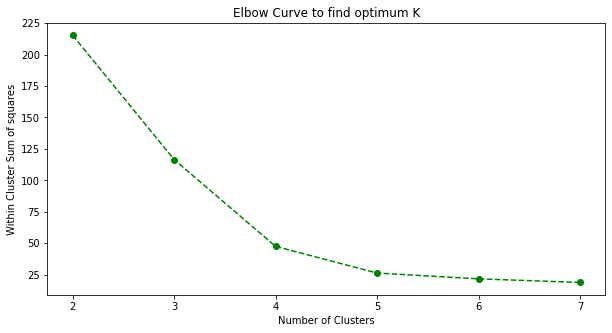

In [14]:
k = list(range(2,8))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(norm_df)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K')

In [7]:
# Instantiating
kmeans5 = KMeans(n_clusters = 5)

# Training the model
kmeans5.fit(norm_df)

# predicting
y_pred = kmeans5.fit_predict(norm_df)
print(y_pred)

# Storing the y_pred values in a new column
df['Cluster'] = y_pred+1 #to start the cluster number from 1

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 0 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 4 4 4 4 0 4
 4 4 0 4 4 4 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 0 0 0 0 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4
 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 4 4 0 0 0 4 0 4 0 0 0
 0 0 0 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4
 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 0 0 0 0 0 0 0 2 0 2 0 0
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 3 3 3 3 3 3 3 3 2 3 2 2 

In [15]:
centroids = kmeans5.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Source', 'Time', 'Protocol'])
centroids.index = np.arange(1, len(centroids)+1) # Start the index from 1
centroids

,Source,Time,Protocol
1,0.728805,0.265832,0.805243
2,0.124538,0.953622,0.827236
3,0.027867,0.605756,0.827471
4,0.727273,0.770550,0.833333
5,0.029437,0.201732,0.829365


<AxesSubplot:xlabel='Source', ylabel='Time'>

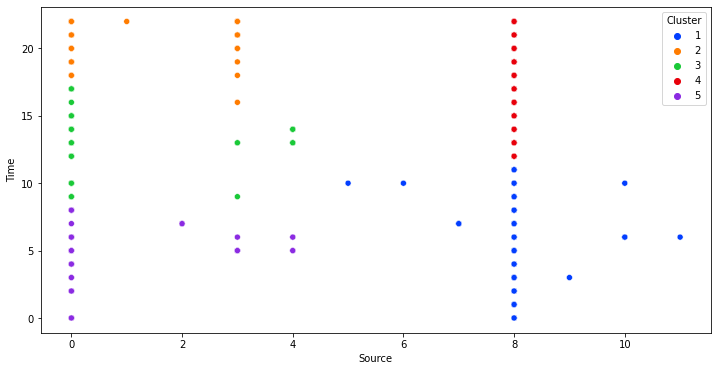

In [16]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=df['Source'], y = df['Time'], hue=df['Cluster'], palette='bright')

<AxesSubplot:xlabel='Source', ylabel='Protocol'>

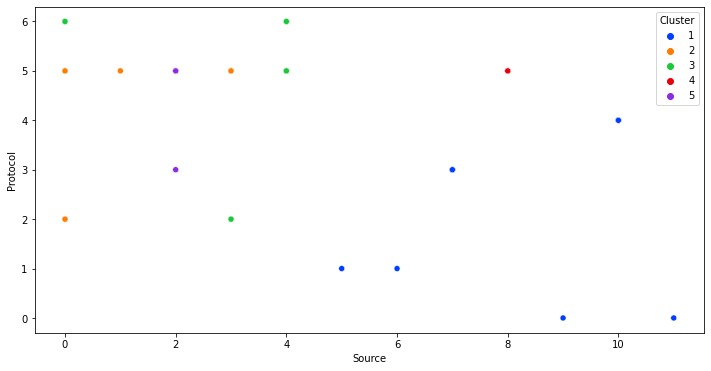

In [17]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=df['Source'], y = df['Protocol'], hue=df['Cluster'], palette='bright')